# Importing Stuff

In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))


# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'MAR_per_OAR_for_patients.csv')
df = pd.read_csv(data_file_path)

df['Targ'] = df['MAR'] > 3.5
data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'Targ', 'OAR', 'patient', 'MAR']]


# Run Analysis witout a config file

In [3]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_output')

analyzer.run()

/home/oem/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/oem/Documents/CDI/AutoML/AutoML/analyzer.py:98: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/oem/Documents/CDI/AutoML/AutoML/analyzer.py:98: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/oem/Documents/CDI/AutoML/AutoML/analyzer.py:105: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  s

Config file not found, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['OAR', 'patient', 'Targ']

Continuous: ['FNPL', 'VolDice', '95HD', 'SurfDist', 'JaccardIndex', 'FNV', 'MAR', 'APL']

Config file not found, checking for outliers in categorical variables...
  - No Outliers found in OAR
  - Outliers found in patient: ['RADCURE-3521: 2 out of 380', 'RADCURE-3689: 2 out of 380', 'RADCURE-3929: 2 out of 380', 'RADCURE-3425: 2 out of 380', 'RADCURE-2976: 2 out of 380', 'RADCURE-3698: 2 out of 380']
  - No Outliers found in Targ
Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ FNPL, mea

# Run with edited config.yaml
Here I moved patient from categorical to other

In [4]:
analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_updated', config_file='./analysis_output/config.yaml')

analyzer.run()

/home/oem/Documents/CDI/AutoML/AutoML/analyzer.py:154: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.data.loc[:, self.continuous_columns] = self.data.loc[:, self.continuous_columns].applymap(lambda x: pd.to_numeric(x, errors='coerce')) # Replace all non numerical values with NaN
/home/oem/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/tableone/tableone.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self._categorical] = handle_categorical_nulls(data[self._categorical])


Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ FNPL, mean (SD)         │                │ 0         │ 675.6 (861.7)   │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ VolDice, mean (SD)      │                │ 0         │ 0.8 (0.1)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ 95HD, mean (SD)         │                │ 0         │ 6.2 (21.9)      │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ SurfDist, mean (SD)     │                │ 0         │ 1.3 (1.9)       │
├─────────────────────────┼────────────────┼───────────┼──────

# Run trainer

No path specified. Models will be saved in: "AutogluonModels/ag-20240719_220937"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #188-Ubuntu SMP Wed Jan 10 09:51:01 UTC 2024
CPU Count:          4
Memory Avail:       3.29 GB / 7.61 GB (43.2%)
Disk Space Avail:   597.28 GB / 915.32 GB (65.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast train


Model Leaderbord

                  model  score_val eval_metric
0   WeightedEnsemble_L2   0.800000     roc_auc
1        NeuralNetTorch   0.775000     roc_auc
2              CatBoost   0.766667     roc_auc
3              LightGBM   0.756667     roc_auc
4         LightGBMLarge   0.751111     roc_auc
5               XGBoost   0.736667     roc_auc
6            LightGBMXT   0.735556     roc_auc
7        KNeighborsUnif   0.718333     roc_auc
8      RandomForestEntr   0.710000     roc_auc
9        ExtraTreesEntr   0.707778     roc_auc
10     RandomForestGini   0.707778     roc_auc
11      NeuralNetFastAI   0.701111     roc_auc
12       ExtraTreesGini   0.698889     roc_auc
13       KNeighborsDist   0.691667     roc_auc


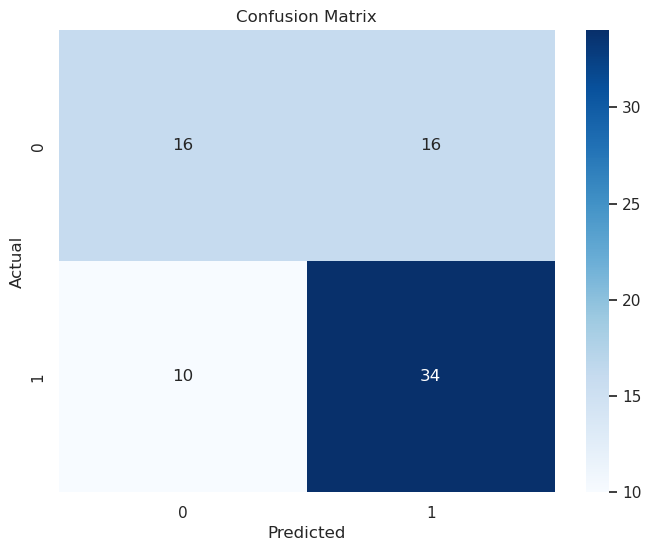

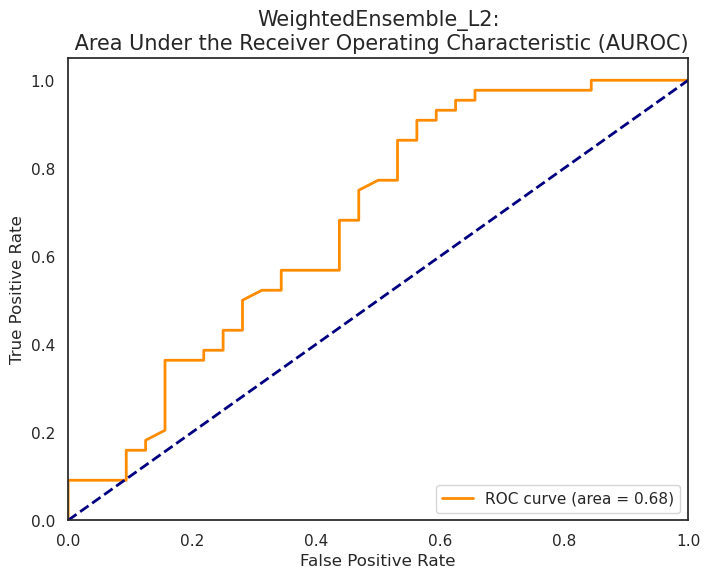

Computing feature importance via permutation shuffling for 7 features using 76 rows with 5 shuffle sets...
	2.22s	= Expected runtime (0.44s per shuffle set)
	0.31s	= Actual runtime (Completed 5 of 5 shuffle sets)


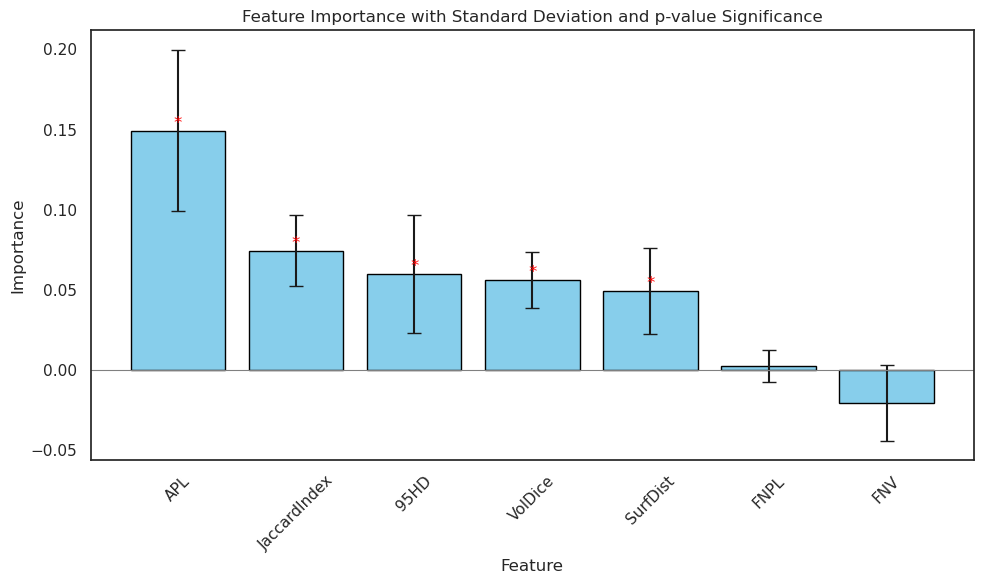

In [5]:
from AutoML.trainer import AutoMLSupervised

trainer = AutoMLSupervised(task='binary')
trainer.run(data, 'Targ', exclude=['OAR', 'patient', 'MAR'], stratify_on='OAR')